<a href="https://colab.research.google.com/github/brunatoloti/quarentena-dados/blob/master/exercicios/aula_e_desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 5 - Machine Learning Enem 2018

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format 

dataset = pd.read_csv('/content/drive/MyDrive/Estudos Python/QuarentenaDados - Alura/dados/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018_SAMPLE_43278.csv')
dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [ ]:
dataset.shape

(137844, 137)

In [ ]:
grades_columns = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
grades_dataset = dataset[grades_columns].dropna()
grades_dataset.columns = ['ciencias_humanas', 'ciencias_natureza', 'linguagens_codigo', 'matematica', 'redacao']
grades_dataset.head()

,ciencias_humanas,ciencias_natureza,linguagens_codigo,matematica,redacao
1,671.30,523.10,661.60,738.00,680.00
2,531.70,409.20,389.00,438.10,600.00
3,505.50,452.30,448.50,544.90,400.00
6,505.20,428.50,521.00,436.80,560.00
8,575.70,491.80,524.40,487.60,660.00


In [ ]:
grades_dataset.shape[0]

97270

Qual a correlação entre as notas das áreas de conhecimento? Podemos tirar alguma conclusão?

In [ ]:
corr = grades_dataset.corr()
corr

,ciencias_humanas,ciencias_natureza,linguagens_codigo,matematica,redacao
ciencias_humanas,1.00,0.57,0.70,0.53,0.50
ciencias_natureza,0.57,1.00,0.60,0.58,0.51
linguagens_codigo,0.70,0.60,1.00,0.57,0.56
matematica,0.53,0.58,0.57,1.00,0.48
redacao,0.50,0.51,0.56,0.48,1.00


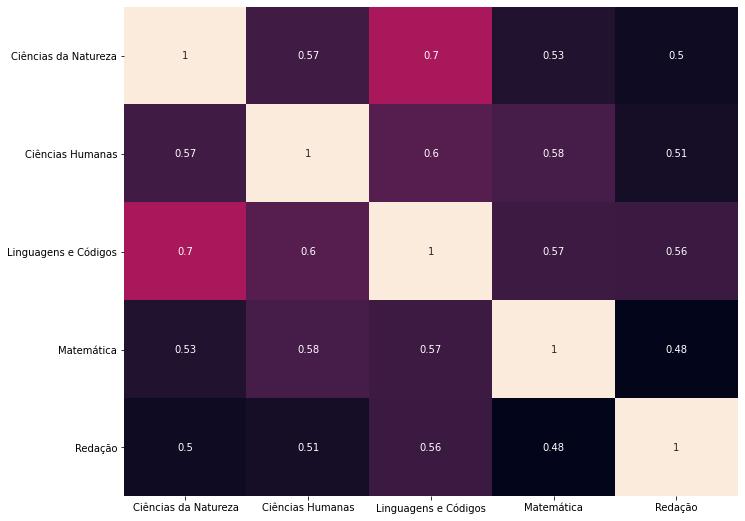

In [ ]:
#Configurando a figura do matplotlib 
f, ax = plt.subplots(figsize=(11,9))
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
#Mapa de calor do Seaborn
sns.heatmap(corr, annot = True, cbar = False, xticklabels = labels, yticklabels = labels)

Ou podemos fazer o pairplot

<Figure size 576x432 with 0 Axes>

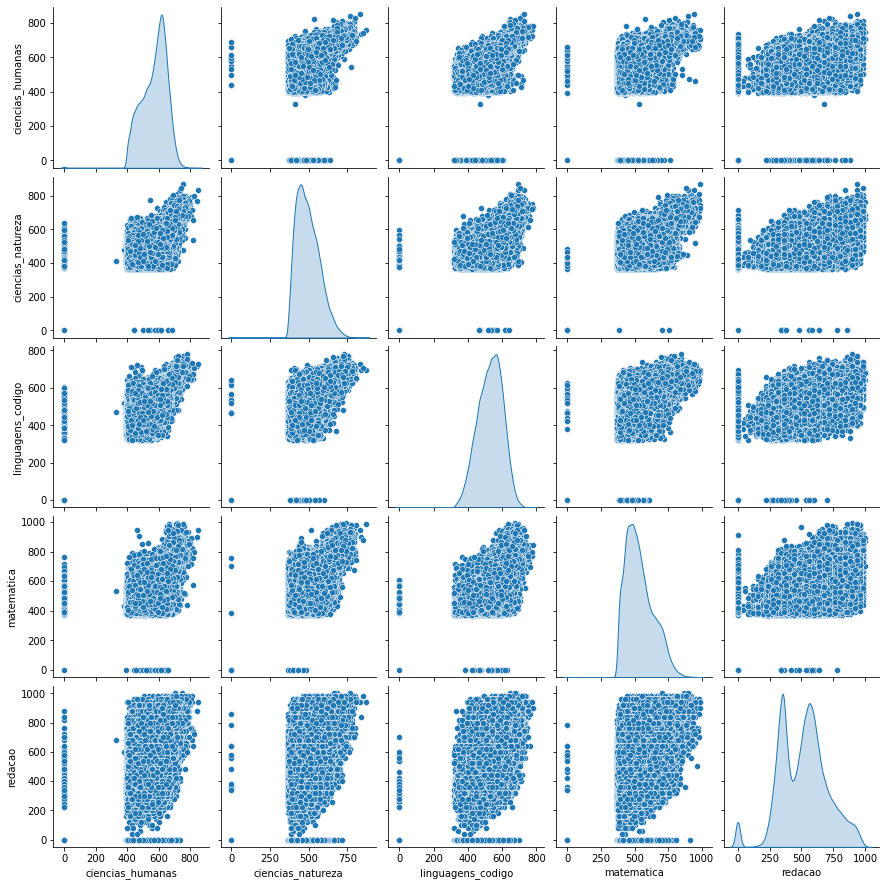

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(data=grades_dataset, diag_kind="kde")

Baseado nas outras notas, quero prever qual a nota de Linguagens e Códigos

In [ ]:
x = grades_dataset[['ciencias_humanas', 'ciencias_natureza', 'matematica', 'redacao']]  #o que tenho
x.head()

,ciencias_humanas,ciencias_natureza,matematica,redacao
1,671.30,523.10,738.00,680.00
2,531.70,409.20,438.10,600.00
3,505.50,452.30,544.90,400.00
6,505.20,428.50,436.80,560.00
8,575.70,491.80,487.60,660.00


In [ ]:
y = grades_dataset[['linguagens_codigo']]  #o que quero prever
y.head()

,linguagens_codigo
1,661.60
2,389.00
3,448.50
6,521.00
8,524.40


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 326784)

In [ ]:
print(f'x_train: \n {x_train.head()}')
print(f'x_train shape: {x_train.shape}')
print('\n')
print(f'x_test: \n {x_test.head()}')
print(f'x_test shape: {x_test.shape}')
print('\n')
print(f'y_train: \n {y_train.head()}')
print(f'y_train shape: {y_train.shape}')
print('\n')
print(f'y_test: \n {y_test.head()}')
print(f'y_test shape: {y_test.shape}')

x_train: 
        ciencias_humanas  ciencias_natureza  matematica  redacao
25012            651.90             610.20      741.40   660.00
52044            639.60             571.70      639.10   680.00
86543            569.10             385.90      502.00   360.00
36362            446.20             424.70      589.80   420.00
96734            850.40             831.40      943.20   940.00
x_train shape: (72952, 4)


x_test: 
         ciencias_humanas  ciencias_natureza  matematica  redacao
67300             659.30             465.40      743.70   560.00
113766            654.00             607.60      620.90   640.00
48328             703.10             632.50      568.10   720.00
9454              615.20             448.00      498.60   620.00
9515              465.40             437.40      523.20   540.00
x_test shape: (24318, 4)


y_train: 
        linguagens_codigo
25012             608.10
52044             622.00
86543             476.40
36362             531.60
96734         

Usando o algoritmo LinearSVR

In [ ]:
from sklearn.svm import LinearSVR

model_svr = LinearSVR()
model_svr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Qual a predição da nota de Linguagens, levando em conta as notas de Ciências Humanas, Ciências da Natureza, Matemática e Redação?

prediction_lc = model_svr.predict(x_test)
prediction_lc[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

In [ ]:
#Mas quais valores que eu tenho realmente?

y_test[:5]

,linguagens_codigo
67300,577.20
113766,624.40
48328,703.00
9454,598.60
9515,458.60


Vejamos o gráfico de dispersão entre esses dois conjuntos

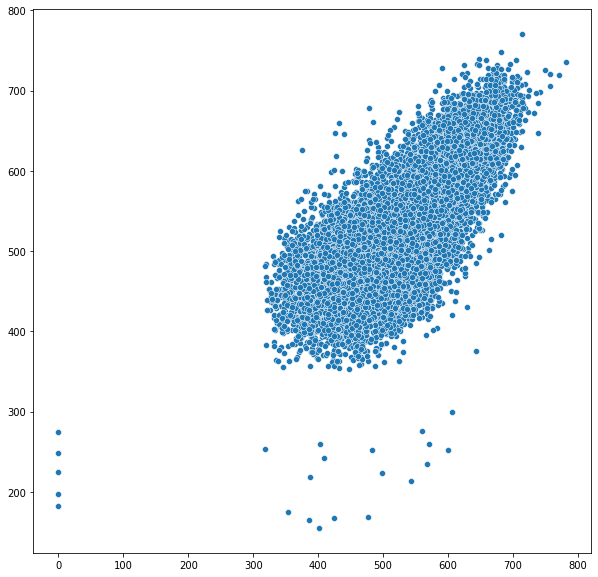

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.linguagens_codigo.values, y=prediction_lc)

Vejamos o gráfico entre o que temos de fato de nota pelo erro da predição

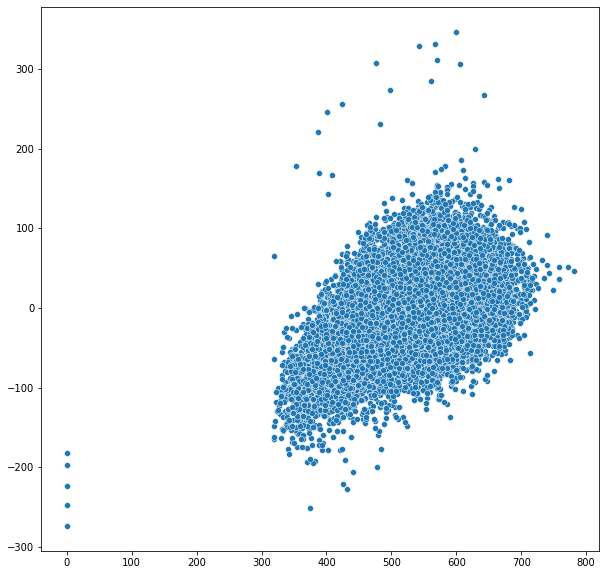

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.linguagens_codigo.values, y=y_test.linguagens_codigo.values - prediction_lc)

Mudando o algoritmo para o DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

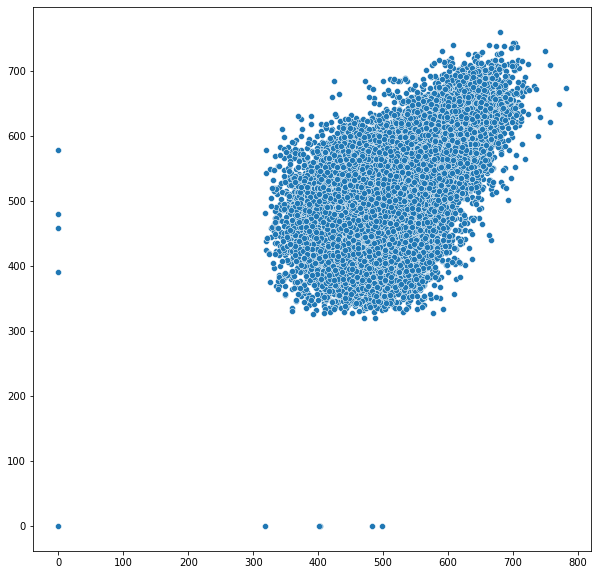

In [ ]:
prediction_lc_tree = model_tree.predict(x_test)
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.linguagens_codigo.values, y=prediction_lc_tree)

Usando um algoritmo Dummy (o dummy é o mais simples e bobo; em teoria, os outros algoritmos devem se sair melhor do que o dummy)

In [ ]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor('mean')
model_dummy.fit(x_train, y_train)
dummy_predictions = model_dummy.predict(x_test)

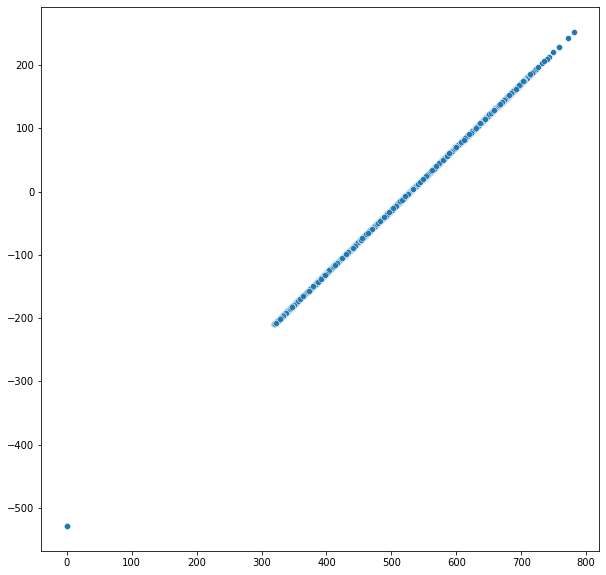

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test.linguagens_codigo.values, y=y_test.linguagens_codigo.values - dummy_predictions)

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem. Dessa forma, ficaria complexo avaliar dois ou três modelos apenas com gráficos. 
Por isso, é importante, além dos gráficos, termos uma métrica com a qual possamos comparar os modelos. Aqui, vamos usar o Erro Quadrático Médio.

Vejamos o erro quadrático médio de cada uma dessas abordagens

In [ ]:
from sklearn.metrics import mean_squared_error

#Erro quadrático médio usando o algoritmo LinearSVR
mean_squared_error(y_test, prediction_lc)

2324.42

In [ ]:
#Erro quadrático médio usando o algoritmo DecisionTree
mean_squared_error(y_test, prediction_lc_tree)

4166.98

In [ ]:
#Erro quadrático médio usando o algoritmo Dummy
mean_squared_error(y_test, dummy_predictions)

5137.48

Lembrando que quanto mais perto o erro quadrático médio estiver do zero melhor, vemos que todos os nossos erros estão um tanto quanto altos. Mas, vemos também que, pelo menos, tanto o algoritmo LinearSVR quanto o DecisionTree estão melhores do que o Dummy! Mas, obviamente, há muito a se fazer ainda, há muito a ser melhorado!

#Desafios - Aula 5

Desafio 1: Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

Mudando C para 5 e max_iter para 10000

In [ ]:
model_svr2 = LinearSVR(C=5, max_iter=10000)
model_svr2.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
prediction_lc2 = model_svr2.predict(x_test)
prediction_lc2[:5]

array([600.1429015 , 616.55521475, 641.50751956, 557.94407101,
       489.92809277])

In [ ]:
#Erro quadrático médio usando o algoritmo LinearSVR, alterando os valores de C e max_iter
mean_squared_error(y_test, prediction_lc2)

2418.96

Mudando C para 7.5 e max_iter para 15000

In [ ]:
model_svr2 = LinearSVR(C=7.5, max_iter=15000)
model_svr2.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=7.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=15000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
prediction_lc2 = model_svr2.predict(x_test)
prediction_lc2[:5]

array([576.79750473, 598.18534054, 624.92846308, 543.89982306,
       480.6993445 ])

In [ ]:
#Erro quadrático médio usando o algoritmo LinearSVR, alterando os valores de C e max_iter
mean_squared_error(y_test, prediction_lc2)

2167.07

Mudando C para 10 e max_iter para 20000

In [ ]:
model_svr2 = LinearSVR(C=10, max_iter=20000)
model_svr2.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=10, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=20000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
prediction_lc2 = model_svr2.predict(x_test)
prediction_lc2[:5]

array([627.4865743 , 643.42461635, 664.50868093, 575.0758261 ,
       519.01881756])

In [ ]:
#Erro quadrático médio usando o algoritmo LinearSVR, alterando os valores de C e max_iter
mean_squared_error(y_test, prediction_lc2)

3581.59

Desafio 2: Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

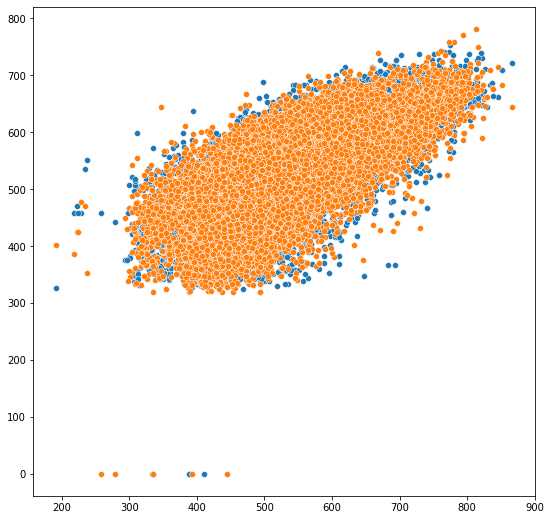

In [ ]:
#Média das 4 notas em relação a cada aluno
mean_x_test = x_test.mean(axis=1)

#Instanciando o modelo
m_tree = DecisionTreeRegressor()
m_tree.fit(x_train, y_train)
language_predict = m_tree.predict(x_test)

#Calculando o erro
error = mean_squared_error(y_test,language_predict)

plt.figure(figsize=(9,9))
sns.scatterplot(x=mean_x_test.values, y=language_predict)
sns.scatterplot(x=mean_x_test.values, y=y_test.linguagens_codigo.values)

In [ ]:
#O erro do modelo:

print(f"O erro do modelo é: {error}")

O erro do modelo é: 4139.292123118677


Visualmente, os dados de teste e de predição se sobrepõem, o que poderia indicar que o modelo está bom. Porém, quando analisamos o valor do erro, vemos que ele está um tanto quanto alto.

Desafio 3: Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [ ]:
dataset_without_0 = dataset.query("NU_NOTA_CN != '0.0' & NU_NOTA_CH != '0.0' & NU_NOTA_LC != '0.0' & NU_NOTA_MT != '0.0'")

In [ ]:
grades_columns = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
grades_dataset2 = dataset_without_0[grades_columns].dropna()
grades_dataset2.columns = ['ciencias_humanas', 'ciencias_natureza', 'linguagens_codigo', 'matematica', 'redacao']

In [ ]:
x2 = grades_dataset2[['ciencias_humanas', 'ciencias_natureza', 'matematica', 'redacao']]  #o que tenho
x2.head()

,ciencias_humanas,ciencias_natureza,matematica,redacao
1,671.30,523.10,738.00,680.00
2,531.70,409.20,438.10,600.00
3,505.50,452.30,544.90,400.00
6,505.20,428.50,436.80,560.00
8,575.70,491.80,487.60,660.00


In [ ]:
y2 = grades_dataset2[['linguagens_codigo']]  #o que quero prever
y2.head()

,linguagens_codigo
1,661.60
2,389.00
3,448.50
6,521.00
8,524.40


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state = 326784)

In [ ]:
model_svr2 = LinearSVR()
model_svr2.fit(x_train2, y_train2)

prediction_lc2 = model_svr2.predict(x_test2)

#Erro quadrático médio usando o algoritmo LinearSVR
mean_squared_error(y_test2, prediction_lc2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3052.52

In [ ]:
model_tree2 = DecisionTreeRegressor()
model_tree2.fit(x_train2, y_train2)

prediction_lc_tree2 = model_tree2.predict(x_test2)

#Erro quadrático médio usando o algoritmo DecisionTree
mean_squared_error(y_test2, prediction_lc_tree2)

3999.79

In [ ]:
model_dummy2 = DummyRegressor('mean')
model_dummy2.fit(x_train2, y_train2)
dummy_predictions2 = model_dummy2.predict(x_test2)

#Erro quadrático médio usando o algoritmo Dummy
mean_squared_error(y_test2, dummy_predictions2)

5097.90

Desafio 4: Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [ ]:
model_svr = LinearSVR()
model_svr.fit(x_train, y_train)

prediction_lc = model_svr2.predict(x_train)

#Erro quadrático médio usando o algoritmo LinearSVR
mean_squared_error(y_train, prediction_lc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3088.80

Para o LinearSVR, neste caso, o erro quadrático médio do conjunto de treino é maior que o do conjunto de teste, porém nem chegou perto do zero. Ou seja, o modelo não se aplica bem nem ao conjunto de treino nem ao conjunto de teste. 

In [ ]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

prediction_lc_tree = model_tree.predict(x_train)

#Erro quadrático médio usando o algoritmo DecisionTree
mean_squared_error(y_train, prediction_lc_tree)

0.00

Para o DecisionTreeRegressior, o erro quadrático médio em relação ao conjunto de treino deu zero, enquanto que o do conjunto de teste deu relativamente alto. Ou seja, o modelo se aplica muito bem ao conjunto de treino, mas não ao conjunto de teste. Aqui, podemos ver o problema de overfitting.

In [ ]:
model_dummy = DummyRegressor('mean')
model_dummy.fit(x_train, y_train)
dummy_predictions = model_dummy.predict(x_train)

#Erro quadrático médio usando o algoritmo Dummy
mean_squared_error(y_train, dummy_predictions)

5166.85

Para o Dummy, o erro quadrático médio do conjunto de treino é maior que o do conjunto de teste, porém nem chegou perto do zero. Ou seja, o modelo não se aplica bem nem ao conjunto de treino nem ao conjunto de teste. 